In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
houses_train = pd.read_csv('houses_train.csv')
houses_test = pd.read_csv('houses_test.csv')

First of all i googled what are important factors to determine how much a house price , that's what i found:

- if the property have free space to build new rooms , so maybe we'll calculate the lot free area.
- number of bathrooms : houses with more bathroooms are more valuable , even more if they have many bedrooms, maybe we can calculate the difference between the number of bathrooms and the number of bedrooms
- if the property has a garage or parking spot
- age and condition , in the dataset we have many features about quality and condition , we also have the date of the last remodel

# EDA on the train data

In [3]:
houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
columns_with_null_values = houses_train.columns[houses_train.isna().any()].tolist()

In [7]:
type(columns_with_null_values)

list

In [8]:
#getting the name and total number of null values per column
columns_with_null_values_sum = {}
for column_name in columns_with_null_values:
    columns_with_null_values_sum[column_name] = houses_train[column_name].isnull().sum()

In [9]:
# import o ProfileReport
import pandas_profiling as pp

In [10]:
profile = pp.ProfileReport(houses_train, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [11]:
#profile

In [12]:
# salvando o relatório no disco
#profile.to_file(output_file="Relatorio01.html")

# Handling missing data

In [13]:
columns_with_null_values_sum

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

## Alley column

In [14]:
#there are so many null values for Alley , we'll drop the entire column
houses_train.drop(['Alley'],axis=1,inplace=True)

## MasVnrType column

In [15]:
houses_train['MasVnrType'].isna().sum()

8

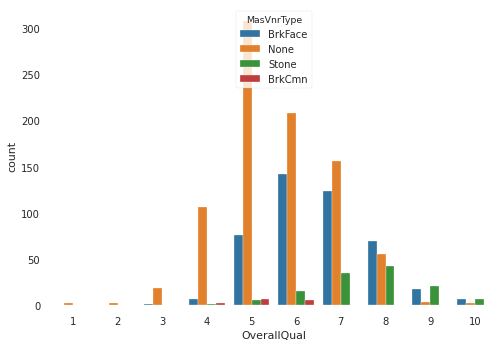

In [16]:
sns.countplot(houses_train['OverallQual'] , hue= houses_train['MasVnrType'])
#BrkFace and stone is used in better quality houses

In [20]:
def input_MasVnrType(cols):
    
    MasVnrType = cols[0]
    OverallQual = cols[1]
    if pd.isnull(MasVnrType):
        if OverallQual < 8:
            return 'None'
        elif OverallQual > 8:
            return 'Stone'
        else:
            return 'BrkFace'
    else:
        return MasVnrType

In [41]:
houses_train['MasVnrType'] = houses_train[['MasVnrType','OverallQual']].apply(input_MasVnrType,axis = 1)

In [42]:
houses_train['MasVnrType'].isna().sum()

0

##  MasVnrArea column

In [22]:
houses_train['MasVnrArea'].isna().sum()

8

In [46]:
houses_train[['MasVnrArea','MasVnrType','OverallQual']]

,MasVnrArea,MasVnrType,OverallQual
0,196.0,BrkFace,7
1,0.0,None,6
2,162.0,BrkFace,7
3,0.0,None,7
4,350.0,BrkFace,8
...,...,...,...
1455,0.0,None,6
1456,119.0,Stone,6
1457,0.0,None,7
1458,0.0,None,5


In [40]:
#not every house has a MasVnr , so we'll calculate the mean only of those that has one.
MasVnrArea_mean = houses_train[houses_train['MasVnrType'] != 'None']['MasVnrArea'].mean()

In [52]:
def input_MasVnrArea(MasVnrType):
    
    #if there isn't a masVnr the area is 0
    if MasVnrType[0] == 'None' :
        return 0.0
    #if there is a masVnr the area is the mean previously calculated
    else:
        return MasVnrArea_mean

In [51]:
houses_train['MasVnrArea'] = houses_train[['MasVnrType']].apply(input_MasVnrArea,axis = 1)

In [53]:
houses_train['MasVnrArea'].isna().sum()

0